In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv("data/tatamotors.csv")

In [65]:
sequence_length = 12

In [66]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [67]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])

In [68]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [69]:
X, y = create_sequences(scaled_data, sequence_length)

In [70]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [89]:
model = Sequential([
    LSTM(70, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(len(features))
])

In [90]:
model.compile(optimizer='adam', loss='mse')

In [91]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50


9/9 [==============================] - 2s 49ms/step - loss: 0.0092 - val_loss: 0.0098
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.0031 - val_loss: 0.0082
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0014 - val_loss: 0.0098
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 9.8668e-04 - val_loss: 0.0251
Epoch 5/50
9/9 [==============================] - 0s 12ms/step - loss: 9.2792e-04 - val_loss: 0.0143
Epoch 6/50
9/9 [==============================] - 0s 13ms/step - loss: 8.3549e-04 - val_loss: 0.0145
Epoch 7/50
9/9 [==============================] - 0s 12ms/step - loss: 7.6975e-04 - val_loss: 0.0144
Epoch 8/50
9/9 [==============================] - 0s 12ms/step - loss: 7.4531e-04 - val_loss: 0.0133
Epoch 9/50
9/9 [==============================] - 0s 11ms/step - loss: 7.2095e-04 - val_loss: 0.0144
Epoch 10/50
9/9 [==============================] - 0s 12ms/step - loss: 7.0872e-04 - val_loss: 0.0129
Epoch 11/50


In [92]:
forecast = []
current_batch = X_test[-1].reshape((1, sequence_length, len(features)))

In [93]:
for i in range(len(y_test)):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


In [106]:
forecast = scaler.inverse_transform(forecast)
forecast_dates = pd.date_range(start=data['Date'].iloc[-1], periods=len(forecast)+1, freq='M')[1:]
forecast_df = pd.DataFrame(forecast, columns=features)
forecast_df['Date'] = forecast_dates

/tmp/ipykernel_4072/1701601951.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=data['Date'].iloc[-1], periods=len(forecast)+1, freq='M')[1:]


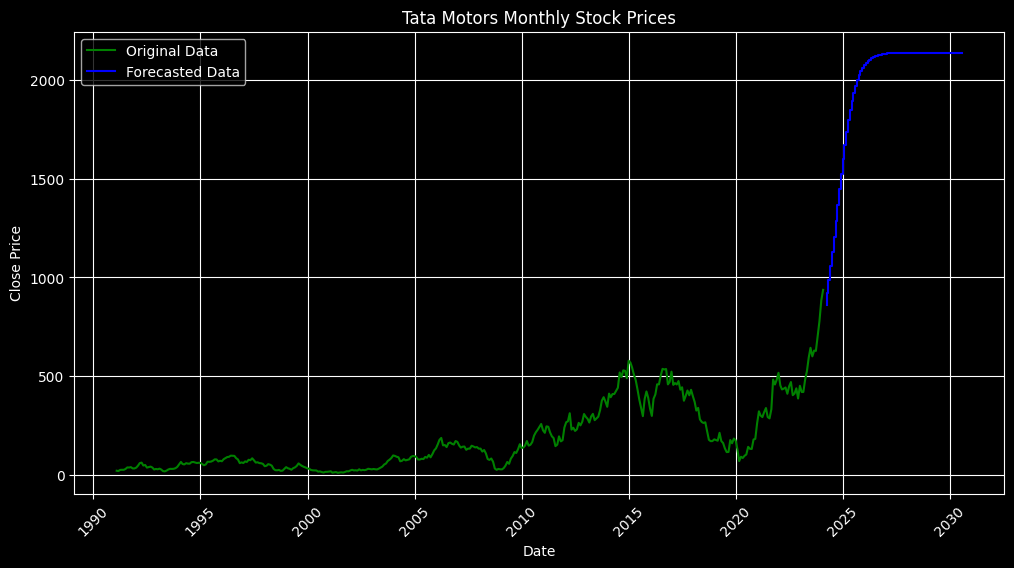

In [105]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(data['Date'], data['Close'], label='Original Data', color='green')

# Plot forecasted data with steps
plt.step(forecast_df['Date'], forecast_df['Close'], label='Forecasted Data', color='blue')

plt.title('Tata Motors Monthly Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
